#  Import Libaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
import kagglehub

# Use the default path provided by kagglehub within the Colab environment.
# Remove the 'path' argument or set it to None.
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")
print("Path to dataset files:", path)

# Access the data from the default location.
# Example:
# data = pd.read_csv(f"{path}/your_data_file.csv")

Path to dataset files: /kaggle/input/new-plant-diseases-dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

## Training Image Preprocessing

In [4]:
training_set= tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


## Validation Image Preprocessing

In [5]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',

    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [ ]:
for image_batch, labels_batch in training_set:
  print(image_batch,image_batch.shape)
  print(labels_batch,labels_batch.shape)
  break

tf.Tensor(
[[[[218.   214.   215.  ]
   [187.25 183.25 184.25]
   [201.5  197.5  198.5 ]
   ...
   [152.75 142.75 140.75]
   [159.75 149.75 147.75]
   [151.75 141.75 139.75]]

  [[175.5  171.5  172.5 ]
   [214.5  210.5  211.5 ]
   [190.75 186.75 187.75]
   ...
   [146.5  136.5  134.5 ]
   [152.25 142.25 140.25]
   [154.5  144.5  142.5 ]]

  [[188.5  184.5  185.5 ]
   [186.   182.   183.  ]
   [192.75 188.75 189.75]
   ...
   [154.   144.   142.  ]
   [151.   141.   139.  ]
   [150.25 140.25 138.25]]

  ...

  [[167.25 165.25 168.25]
   [165.5  163.5  166.5 ]
   [169.   167.   170.  ]
   ...
   [142.25 136.25 138.25]
   [142.25 136.25 138.25]
   [135.5  129.5  131.5 ]]

  [[174.   172.   175.  ]
   [161.   159.   162.  ]
   [167.25 165.25 168.25]
   ...
   [141.75 135.75 137.75]
   [134.   128.   130.  ]
   [142.75 136.75 138.75]]

  [[176.25 174.25 177.25]
   [165.75 163.75 166.75]
   [169.5  167.5  170.5 ]
   ...
   [133.5  127.5  129.5 ]
   [135.75 129.75 131.75]
   [130.   124.   12

# Building Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model=Sequential()

In [ ]:
# first layer
model.add(Conv2D(32, (3, 3),padding='same' , activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3),padding='same' , activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2))

# second layer
model.add(Conv2D(64, (3, 3),padding='same' , activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same' , activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2))

# third layer
model.add(Conv2D(128, (3, 3),padding='same' , activation='relu'))
model.add(Conv2D(128, (3, 3),padding='same' , activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2))

# fourth layer
model.add(Conv2D(256, (3, 3),padding='same' , activation='relu'))
model.add(Conv2D(256, (3, 3),padding='same' , activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2))


# flatening the output
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#output layer
model.add(Dense(38, activation='softmax'))








/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiling the Model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,274,438 (12.49 MB)

 Trainable params: 3,274,438 (12.49 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [ ]:
training_history=model.fit(training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 53ms/step - accuracy: 0.4307 - loss: 2.2368 - val_accuracy: 0.8071 - val_loss: 0.6005
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 101s 46ms/step - accuracy: 0.8525 - loss: 0.4638 - val_accuracy: 0.8870 - val_loss: 0.3560
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 101s 46ms/step - accuracy: 0.9036 - loss: 0.2953 - val_accuracy: 0.8972 - val_loss: 0.3168
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 101s 46ms/step - accuracy: 0.9264 - loss: 0.2233 - val_accuracy: 0.9155 - val_loss: 0.2748
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 100s 46ms/step - accuracy: 0.9340 - loss: 0.1972 - val_accuracy: 0.9117 - val_loss: 0.2781
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 100s 45ms/step - accuracy: 0.9419 - loss: 0.1774 - val_accuracy: 0.9247 - val_loss: 0.2446
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 100s 45ms/step - accuracy: 0.9470 - loss: 0.1585 - val_accuracy: 0.9073 - val_loss: 0.3117
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 100s 45ms/step - accuracy: 

# Model Evaluation

In [ ]:
train_loss, train_accuracy=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.9598 - loss: 0.1183


In [ ]:
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

Training Loss: 0.10864955186843872
Training Accuracy: 0.9633686542510986


In [ ]:
valid_loss, valid_accuracy=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9174 - loss: 0.2817


In [ ]:
print("Validation Loss:", valid_loss)
print("Validation Accuracy:", valid_accuracy)

Validation Loss: 0.282580703496933
Validation Accuracy: 0.9200432300567627


In [ ]:
# saving model
dir_path = '/content/drive/MyDrive/disease project/plant_disease_model.keras'
model.save(dir_path)


In [ ]:
training_history.history

{'accuracy': [0.6294046640396118,
  0.8700618743896484,
  0.9071199893951416,
  0.9273632764816284,
  0.9351447224617004,
  0.9419019818305969,
  0.9469094276428223,
  0.9508357644081116,
  0.950522780418396,
  0.9555871486663818],
 'loss': [1.2874411344528198,
  0.4034126400947571,
  0.2829589247703552,
  0.22013214230537415,
  0.19555360078811646,
  0.17617732286453247,
  0.15884597599506378,
  0.1501844823360443,
  0.1528160721063614,
  0.13824599981307983],
 'val_accuracy': [0.8071363568305969,
  0.8869792819023132,
  0.8971659541130066,
  0.9154905676841736,
  0.9116776585578918,
  0.9247097373008728,
  0.9072957038879395,
  0.8990439176559448,
  0.9208968877792358,
  0.9200432300567627],
 'val_loss': [0.6004719734191895,
  0.35601726174354553,
  0.3167908191680908,
  0.27475106716156006,
  0.27809858322143555,
  0.2445927858352661,
  0.31165459752082825,
  0.35392293334007263,
  0.2742313742637634,
  0.28258082270622253]}

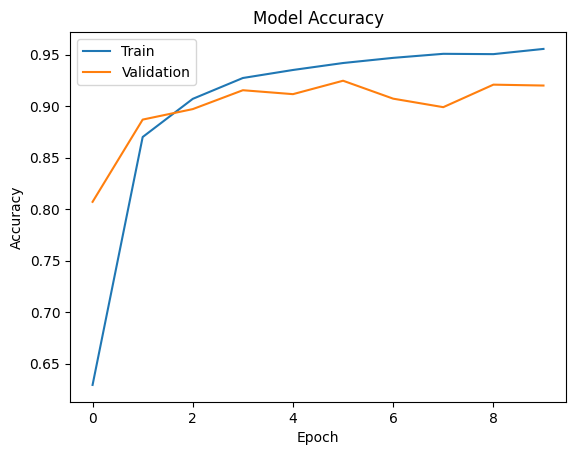

In [ ]:
# Plot the graph
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

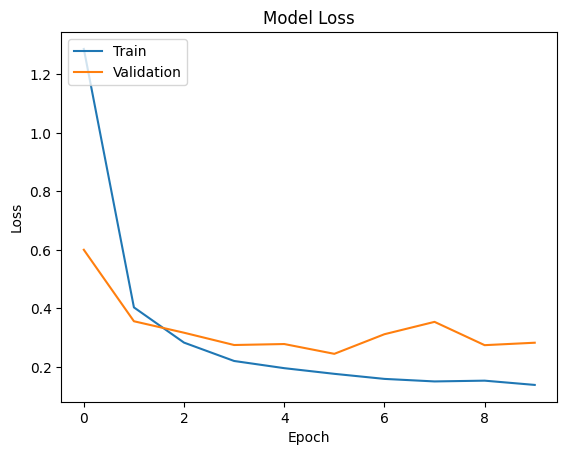

In [ ]:
# plotting the loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Reading history in JSON
import json
with open('/content/drive/MyDrive/disease project/history.json', 'w') as f:
    json.dump(training_history.history, f)

In [6]:
# load model
model = tf.keras.models.load_model('/content/drive/MyDrive/disease project/plant_disease_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 22 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Evaluating more metrics

In [8]:
class_names = training_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [9]:
test_set=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',

    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [10]:
y_pred = model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step


array([[9.9998581e-01, 4.9503801e-06, 1.3660960e-12, ..., 1.3567490e-18,
        5.0702701e-17, 1.6918668e-11],
       [9.9999428e-01, 6.6205721e-09, 4.1593163e-14, ..., 4.9331760e-16,
        1.2250918e-16, 5.1169836e-14],
       [9.9999940e-01, 2.9393543e-10, 2.1487318e-13, ..., 2.3977096e-17,
        1.9496428e-18, 5.3896897e-11],
       ...,
       [1.4376131e-05, 1.7112645e-15, 1.2874695e-08, ..., 9.0359015e-07,
        9.2826836e-11, 9.7772706e-01],
       [1.3900753e-12, 1.0725897e-21, 6.2366222e-17, ..., 3.9932671e-09,
        4.6585986e-15, 9.9999928e-01],
       [8.8905974e-14, 9.8427247e-21, 1.2230822e-15, ..., 1.7650631e-10,
        3.7512864e-13, 9.9929833e-01]], dtype=float32)

In [11]:
y_pred.shape

(17572, 38)

In [12]:
prediceted_catagory=tf.argmax(y_pred,axis=1)
prediceted_catagory

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [14]:
true_catagory=tf.concat([y for x, y in test_set], axis=0)
true_catagory=tf.argmax(true_catagory,axis=1)
true_catagory

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [16]:
# importing precision and recall
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report

classification_report = classification_report(true_catagory, prediceted_catagory,target_names=class_names)
print(classification_report)



                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.84      0.96      0.90       504
                                 Apple___Black_rot       0.97      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.92      0.94       440
                                   Apple___healthy       0.84      0.94      0.89       502
                               Blueberry___healthy       0.95      0.91      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.94      0.98      0.96       421
                 Cherry_(including_sour)___healthy       0.94      0.98      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.83      0.93      0.88       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.81      0.

# Confusion Matrix Visualization

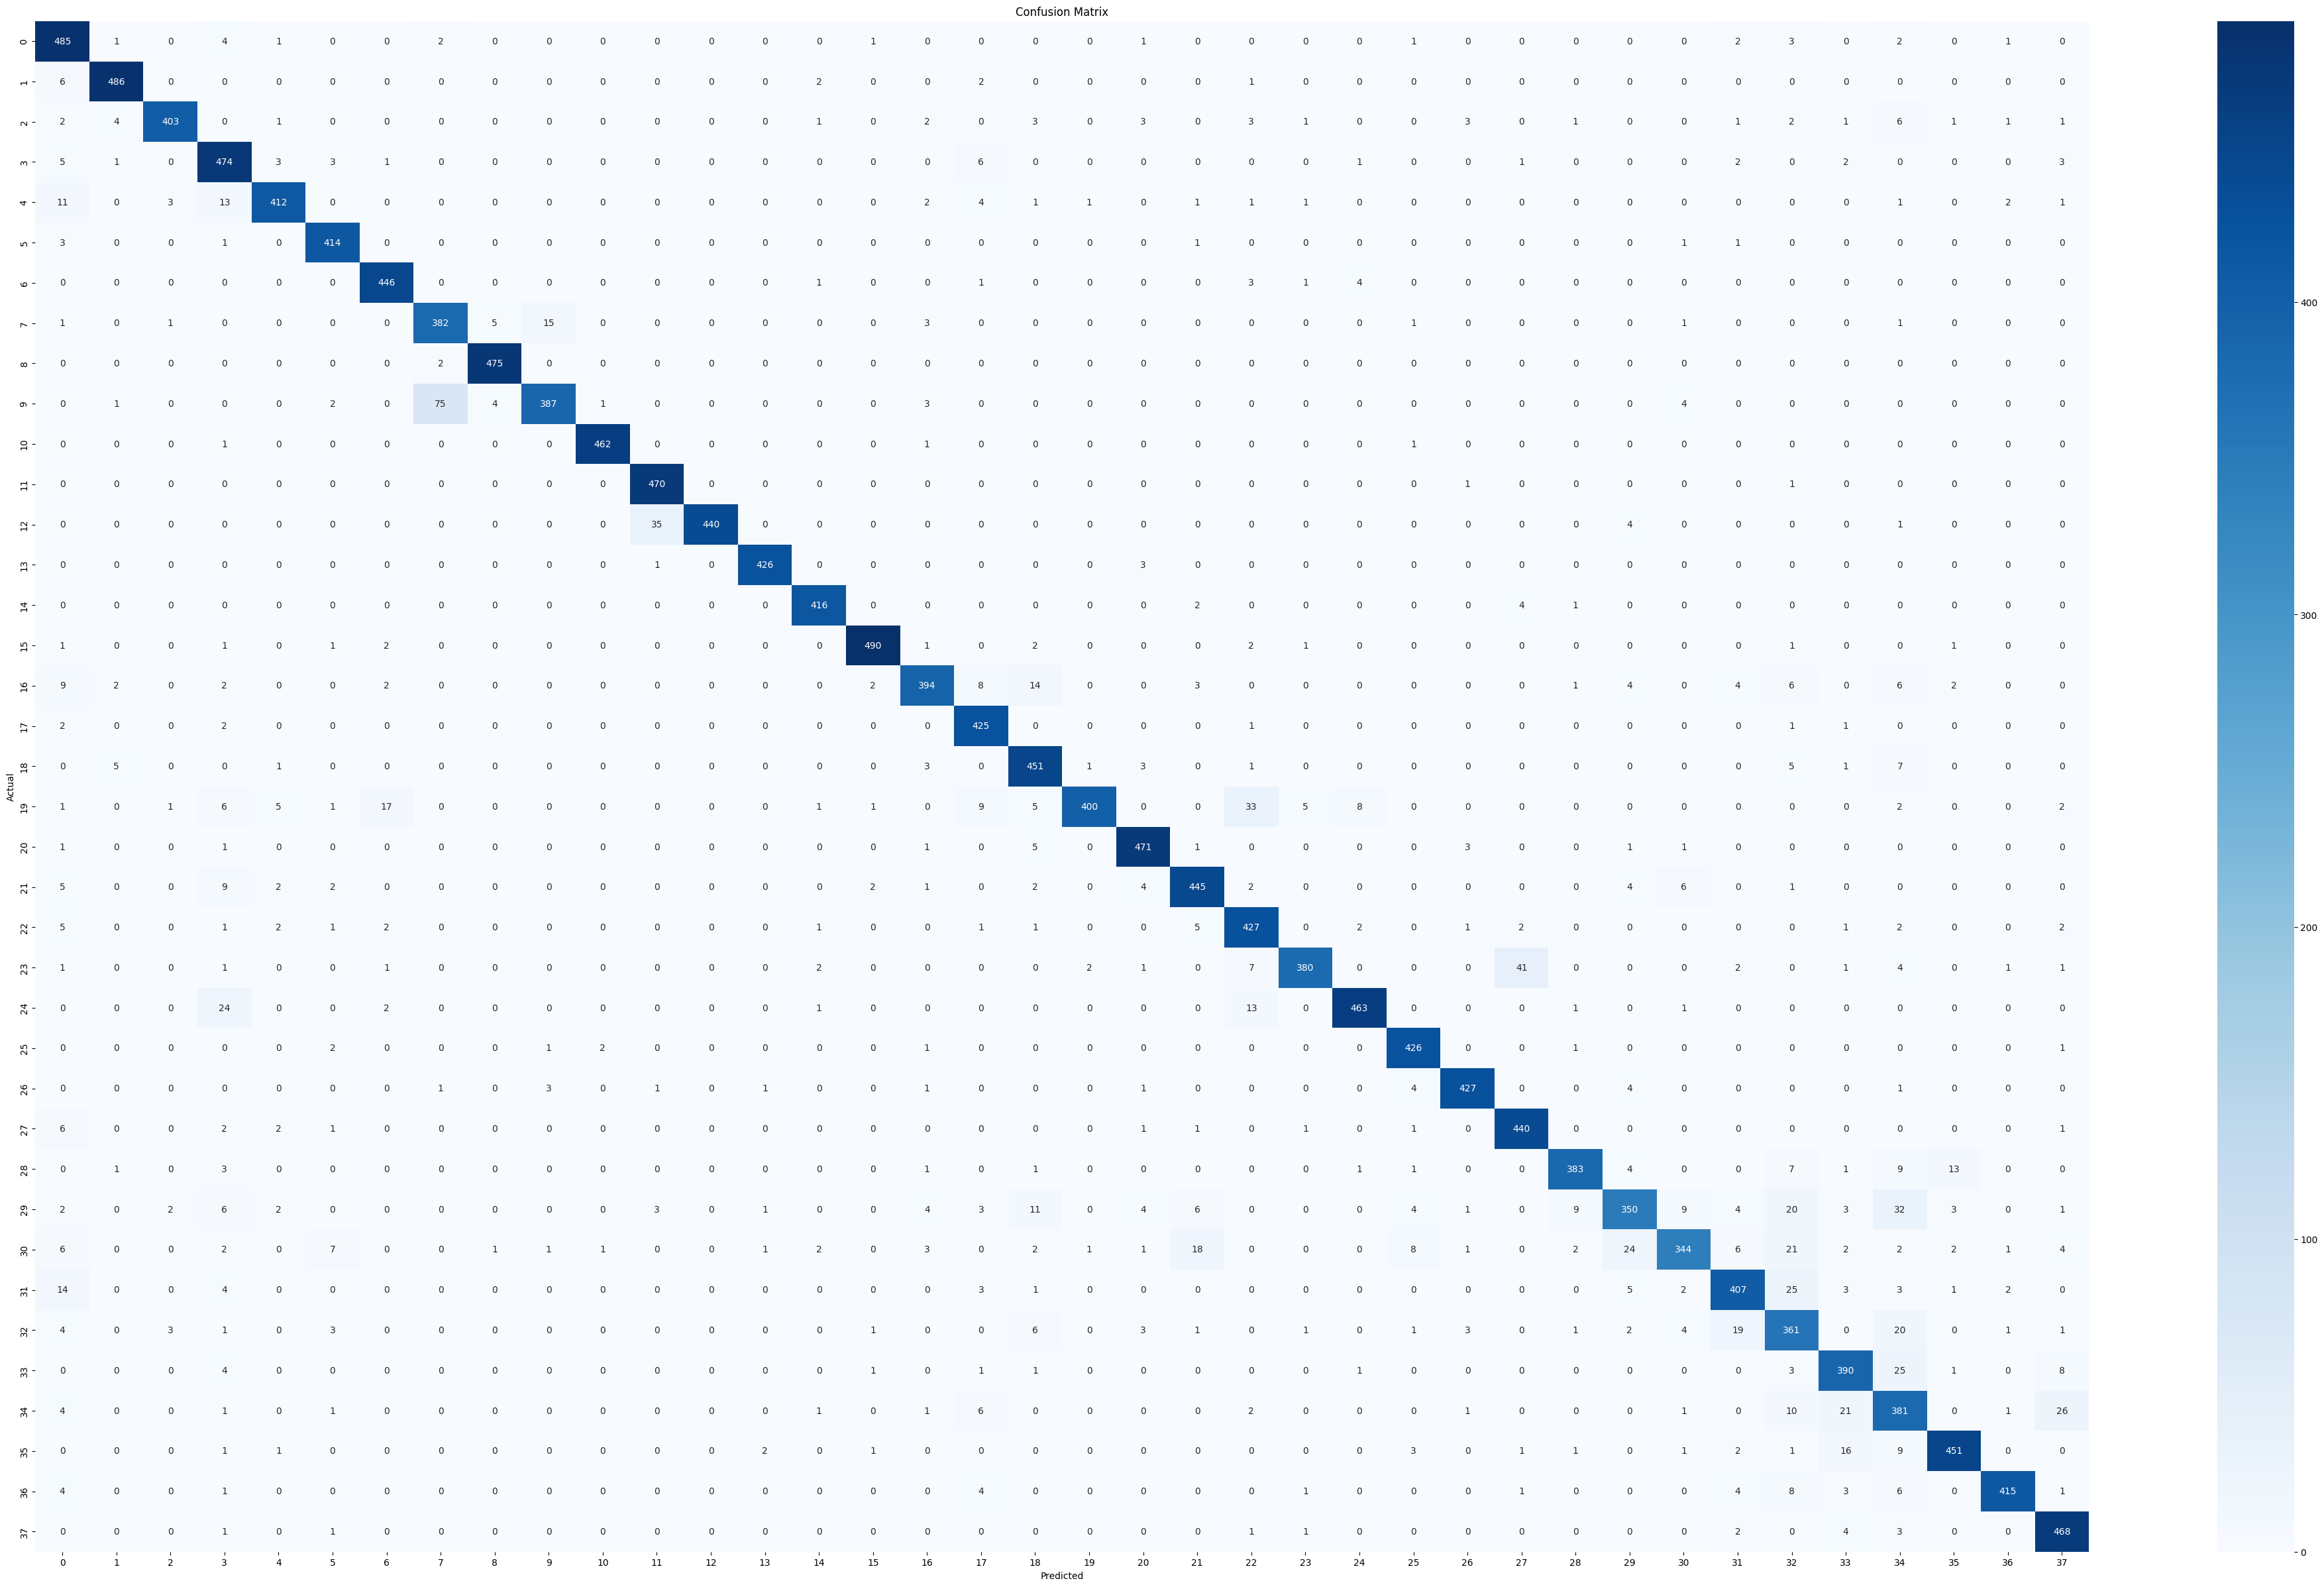

In [23]:
cm=confusion_matrix(true_catagory, prediceted_catagory)
plt.figure(figsize=(50,30))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
